<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/6_5_One_class_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

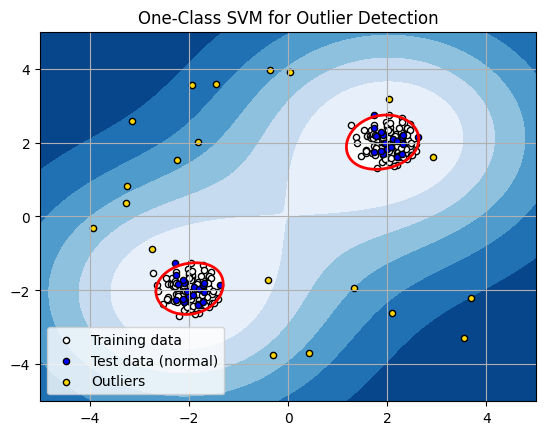

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# 정상 데이터 생성 (2D Gaussian)
X_train = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X_train + 2, X_train - 2]

# 테스트 데이터 생성 (정상 + 이상치)
X_test = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X_test + 2, X_test - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# 모델 학습
clf = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
clf.fit(X_train)

# 예측
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 시각화
plt.title("One-Class SVM for Outlier Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')  # decision boundary

# 데이터 플로팅
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolors='k', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', s=20, edgecolors='k', label='Test data (normal)')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=20, edgecolors='k', label='Outliers')

plt.legend()
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.grid(True)
plt.show()